In [1]:
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Kddcup99 Dataset
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
#df = pd.read_csv('kddcup99.csv')

column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

df = pd.read_csv(url, header=None, names=column_names)
df2 = df.copy()

print(len(df))

KeyboardInterrupt: 

In [5]:
from sklearn.datasets import fetch_kddcup99
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


df = fetch_kddcup99(percent10=True, as_frame=True)["frame"]
print(len(df))

df.head()

494021


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [8]:
X = df.iloc[: , :41]
y = df.iloc[:, 41:]

print(y)

IC = np.unique(y)

print(IC)

df2 = df.copy()

            labels
0       b'normal.'
1       b'normal.'
2       b'normal.'
3       b'normal.'
4       b'normal.'
...            ...
494016  b'normal.'
494017  b'normal.'
494018  b'normal.'
494019  b'normal.'
494020  b'normal.'

[494021 rows x 1 columns]
[b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


In [10]:
vals, df2['labels'] = np.unique(df['labels'].values, return_inverse=True)

y = df2.iloc[:, 41:]

print(vals)
print(y)

print(y.shape)

[b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']
        labels
0           11
1           11
2           11
3           11
4           11
...        ...
494016      11
494017      11
494018      11
494019      11
494020      11

[494021 rows x 1 columns]
(494021, 1)


In [11]:
vals1, X['protocol_type'] = np.unique(df['protocol_type'].values, return_inverse=True)
vals2, X['service'] = np.unique(df['service'].values, return_inverse=True)
vals3, X['flag'] = np.unique(df['flag'].values, return_inverse=True)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X_train)

In [14]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9775135622039594
Test score:  0.9773999291533829


In [16]:
x_labels_w = X_train.columns[:]
Xw = np.array(X_train[x_labels_w].values)

print("Matrix dimensions of Xw is " + str(Xw.shape))

Matrix dimensions of Xw is (395216, 41)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<StemContainer object of 3 artists>

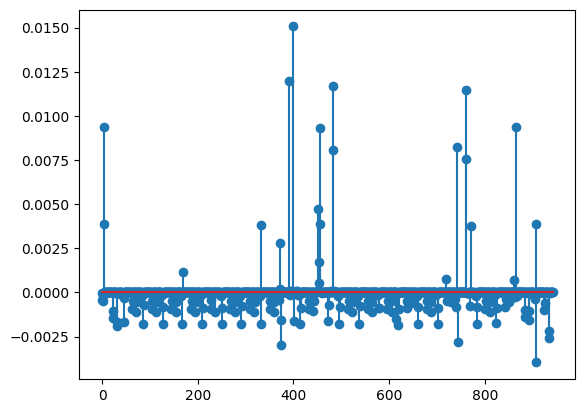

In [17]:
logReg_w = LogisticRegression(C = 1e10)
logReg_w.fit(Xw, y_train)

W = logReg_w.coef_
W = W.flatten()
plt.stem(W)

In [ ]:
print()

In [92]:
print(Xw.shape)
print(y_train.shape)

idx1 = np.argsort(np.abs(W))[-1]
idx2 = np.argsort(np.abs(W))[-2]
idx3 = np.argsort(np.abs(W))[-3]

heavy = [x_labels_w[idx1], x_labels_w[idx2], x_labels_w[idx3]]
print(heavy)

(395216, 41)
(395216, 1)


IndexError: index 400 is out of bounds for axis 0 with size 41